### Simulating the Geometric Brownian process
---

We would like to simulate the SDE

$$
dS_t = \mu S_t dt + \sigma S_t dW_t 
$$

This is reformulated into the recursion relation 

$$
S_{t+\Delta t} = S_t + \mu S_t \Delta t + \sigma S_t (W_t - W_{t+\Delta t})
$$

Since $W_t$ is a wiener's process, $W_t - W_{t+\Delta t} = \sqrt{\Delta t} \cdot N(0,1)$



In [4]:
import numpy as np 
import matplotlib.pyplot as plt
import random

#We are using the euler-mariyama method

def simulate_GBM(mean,vol,T,N,S0):
    dt = T/N
    S = []
    S.append(S0)
    Z = np.random.normal()
    #St = S0 + mean*S0*dt + vol*S0*np.sqrt(dt)*Z
    St = S0*np.exp((mean - vol**2/2)*dt + vol*np.sqrt(dt)*Z)
    S.append(St)
    for i in range(1,N):
        Z = np.random.normal()
        #St1 = St + mean*St*dt + vol*St*np.sqrt(dt)*Z
        St1 = St*np.exp((mean - vol**2/2)*dt + vol*np.sqrt(dt)*Z)
        St = St1
        S.append(St)
    return S

def simulate_GBM_path(n_paths,mean,vol,T,N,S0):
    dt = T/N
    S_paths = []
    for j in range(n_paths):
        S = simulate_GBM(mean,vol,T,N,S0)
        S_paths.append(S)
    return S_paths

def mean_paths(S_path):
    mu = []
    for i in range(len(S_path)):
        mu.append(np.mean(S_path[i]))
    return np.mean(mu)


        



The Empherical value::  101.67578120853267
The theoretical value ::  105.12710963760242


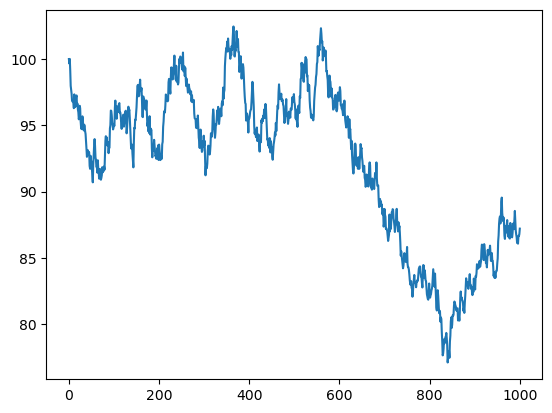

In [79]:
# Parameters
S0 = 100       # Initial asset price
mean = 0.05       # Expected return (5% per year)
vol = 0.2     # Volatility (20% per year)
T = 1.0         # Time horizon (1 year)
N = 1000
n_path = 100

S_paths = simulate_GBM_path(n_path,mean,vol,T,N,S0)
mean_p = mean_paths(S_paths)

print("The Empherical value:: ",mean_p)
print("The theoretical value :: ",S0*np.exp(mean*T))

plt.plot(S_paths[0][:])

(array([ 471., 1550., 1230.,  648.,  746., 1956., 1510., 1271.,  518.,
         101.]),
 array([ 91.31543157,  93.44954845,  95.58366532,  97.7177822 ,
         99.85189907, 101.98601594, 104.12013282, 106.25424969,
        108.38836657, 110.52248344, 112.65660032]),
 <BarContainer object of 10 artists>)

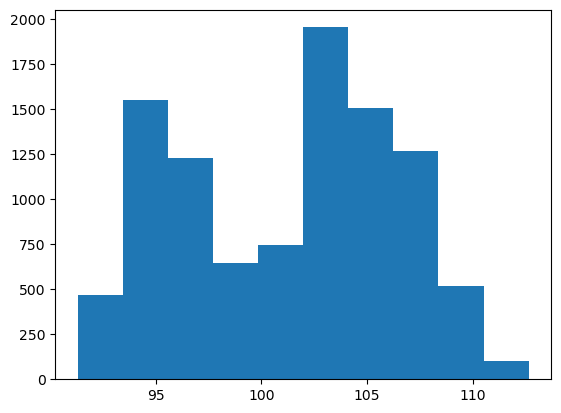

In [31]:
plt.hist(S)

---


### Simulating the Ornstein-Uhlenbeck Process

---

We would like to simulate the SDE

$$
dS_t = \theta(\mu-S_t) dt + \sigma dW_t 
$$

This is reformulated into the recursion relation 

$$
S_{t+\Delta t} = S_t(1 + \theta \Delta t) + \sigma S_t (W_t - W_{t+\Delta t}) + \theta \mu \Delta t
$$

Since $W_t$ is a wiener's process, $W_t - W_{t+\Delta t} = \sqrt{\Delta t} \cdot N(0,1)$


In [5]:
import numpy as np 
import matplotlib.pyplot as plt
import random

def simulate_OU(theta,mean,vol,T,N,S0):
    dt = T/N
    S = np.zeros(N+1)
    S[0] = S0
    for i in range(1,N+1):
        Z = np.random.normal()
        S[i] = S[i-1] + theta*(mean - S[i-1])*dt + vol*np.sqrt(dt)*Z 
        #St1 = St*np.exp((mean - vol**2/2)*dt + vol*np.sqrt(dt)*Z)
    return S

def simulate_OU_path(n_paths,theta,mean,vol,T,N,S0):
    S_paths = []
    for j in range(n_path):
        S = simulate_OU(theta,mean,vol,T,N,S0)
        S_paths.append(S)
    return S_paths

The Empherical value::  0.37878562924175


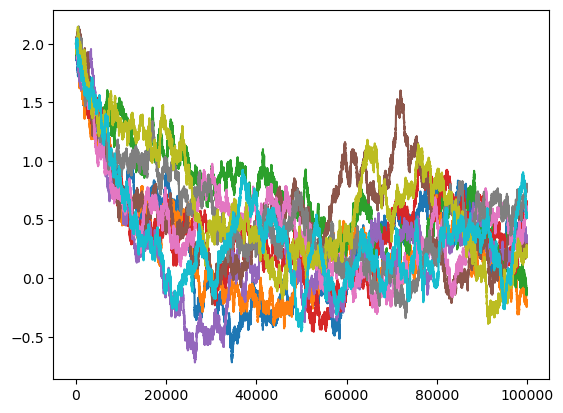

In [8]:
theta = 1
S0 = 2       # Initial asset price
mean = 0.2      # Expected return (5% per year)
vol = 0.5    # Volatility (20% per year)
T = 10.0        # Time horizon (1 year)
N = 100000
n_path = 100

S_paths = simulate_OU_path(n_path,theta,mean,vol,T,N,S0)
mean_p = mean_paths(S_paths)
print("The Empherical value:: ",mean_p)

for i in range(10):
    plt.plot(S_paths[i])

---


### Simulating the Jump Diffusion Process

---
